# Install Requirements.txt

In [ ]:
!pip install -r ../requirements.txt

# Import

In [38]:
# Import necessary libraries
import pandas as pd
import numpy as np
from plotnine import *
import seaborn as sns
import matplotlib.pyplot as plt

# Data Extraction

In [11]:
# Load the dataset
path = "../data/gym_members_exercise_tracking.csv"
df_gym = pd.read_csv(path)

In [12]:
# Display the first few rows to understand the dataset structure
display(df_gym.head())

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


### 1. Data frame info

In [ ]:
df_gym.info()

### 2. Transform

In [33]:
# Convert categorical columns to dummy variables
# This will allow us to include `Gender`, `Workout_Type`, and any other categorical columns in the correlation analysis.
df_encoded = pd.get_dummies(df_gym, columns=["Gender", "Workout_Type"], drop_first=True)

In [34]:
# Display the first few rows of the transformed dataset to confirm the encoding
display(df_encoded.head())

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,is_aerobic,Gender_Male,Workout_Type_HIIT,Workout_Type_Strength,Workout_Type_Yoga
0,56,88.3,1.71,180,157,60,1.69,1313.0,12.6,3.5,4,3,30.20,True,True,False,False,True
1,46,74.9,1.53,179,151,66,1.30,883.0,33.9,2.1,4,2,32.00,True,False,True,False,False
2,32,68.1,1.66,167,122,54,1.11,677.0,33.4,2.3,4,2,24.71,True,False,False,False,False
3,25,53.2,1.70,190,164,56,0.59,532.0,28.8,2.1,3,1,18.41,False,True,False,True,False
4,38,46.1,1.79,188,158,68,0.64,556.0,29.2,2.8,3,1,14.39,False,True,False,True,False


# Expoloratory Data Analysis (EDA)

### 1. Check for missing values

In [13]:
# Identifying any missing values helps to address gaps in the data before analysis.
missing_values = df_gym.isnull().sum()
print("Missing values per column:\n", missing_values)

Missing values per column:
 Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64


### 2. Statistical summary

In [16]:
# Provides basic statistics for numerical columns, showing distribution, mean, and standard deviation.
summary_stats = df_gym.describe().T
summary_stats

,count,mean,std,min,25%,50%,75%,max
Age,973.0,38.683453,12.180928,18.00,28.00,40.00,49.00,59.00
Weight (kg),973.0,73.854676,21.207500,40.00,58.10,70.00,86.00,129.90
Height (m),973.0,1.722580,0.127720,1.50,1.62,1.71,1.80,2.00
Max_BPM,973.0,179.883864,11.525686,160.00,170.00,180.00,190.00,199.00
Avg_BPM,973.0,143.766701,14.345101,120.00,131.00,143.00,156.00,169.00
Resting_BPM,973.0,62.223022,7.327060,50.00,56.00,62.00,68.00,74.00
Session_Duration (hours),973.0,1.256423,0.343033,0.50,1.04,1.26,1.46,2.00
Calories_Burned,973.0,905.422405,272.641516,303.00,720.00,893.00,1076.00,1783.00
Fat_Percentage,973.0,24.976773,6.259419,10.00,21.30,26.20,29.30,35.00
Water_Intake (liters),973.0,2.626619,0.600172,1.50,2.20,2.60,3.10,3.70


### 3. Distribution of Workout_Type

In [17]:
# Displaying unique workout types to understand exercise variety.
workouts_distinct = df_gym["Workout_Type"].unique()
print("Distinct Workout_Types: ", workouts_distinct)

Distinct Workout_Types:  ['Yoga' 'HIIT' 'Cardio' 'Strength']


In [18]:
# Count the occurrences of each Workout_Type
workouts_count = df_gym.groupby("Workout_Type").size().reset_index(name="count")
print("Workout_Type count:\n", workouts_count)

Workout_Type count:
   Workout_Type  count
0       Cardio    255
1         HIIT    221
2     Strength    258
3         Yoga    239


C:\Users\raiss\AppData\Local\Temp\ipykernel_31044\1583876528.py:7: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


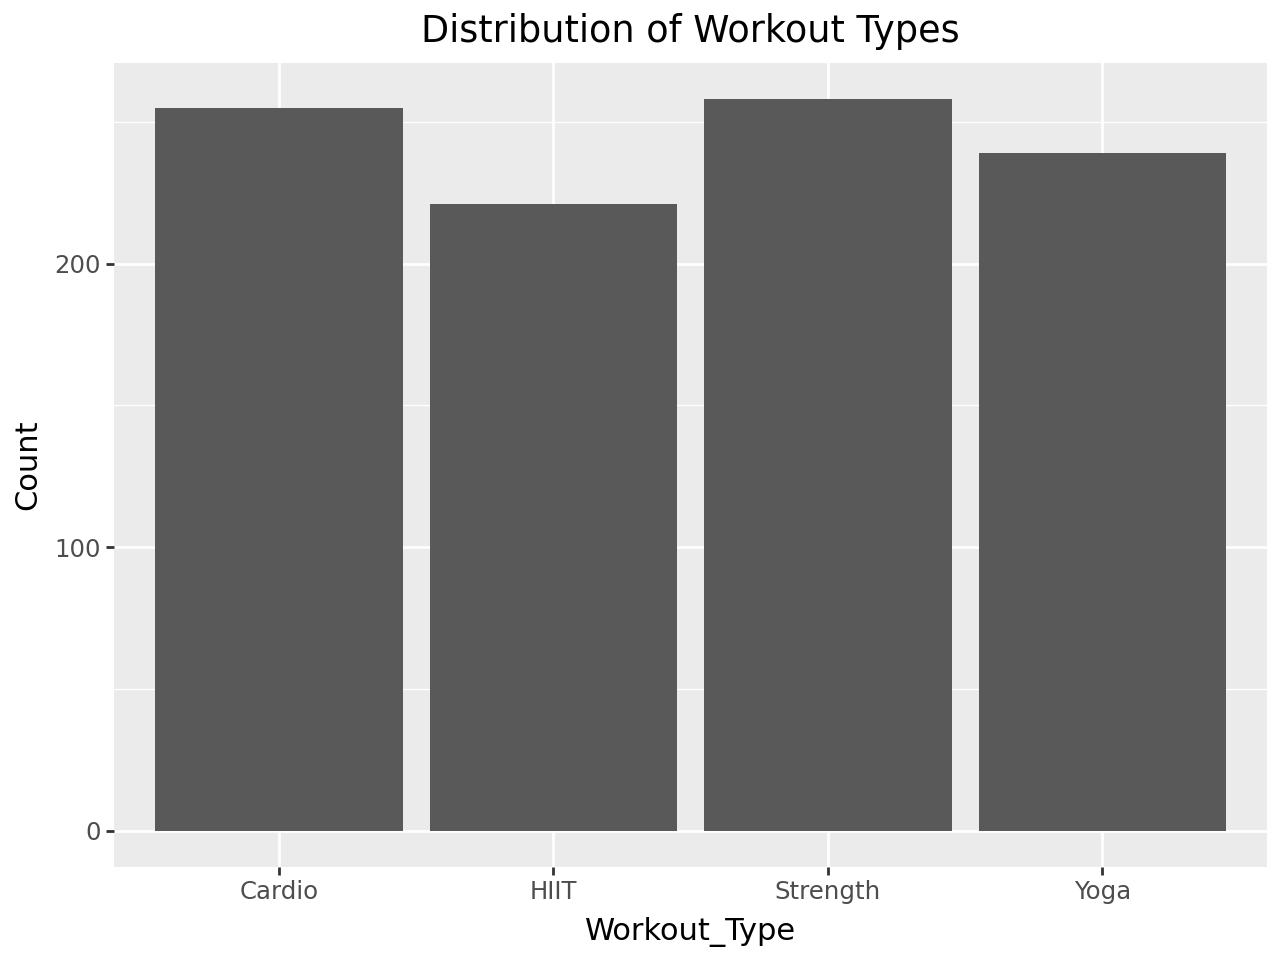

In [19]:
# Plot the distribution of Workout_Type
plot_workout_type = (
    ggplot(df_gym, aes(x="Workout_Type"))
    + geom_bar()
    + labs(title="Distribution of Workout Types", x="Workout_Type", y="Count")
)
print(plot_workout_type)

### 4. Analysis of Calories Burned by Workout Type

C:\Users\raiss\AppData\Local\Temp\ipykernel_31044\712939453.py:7: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


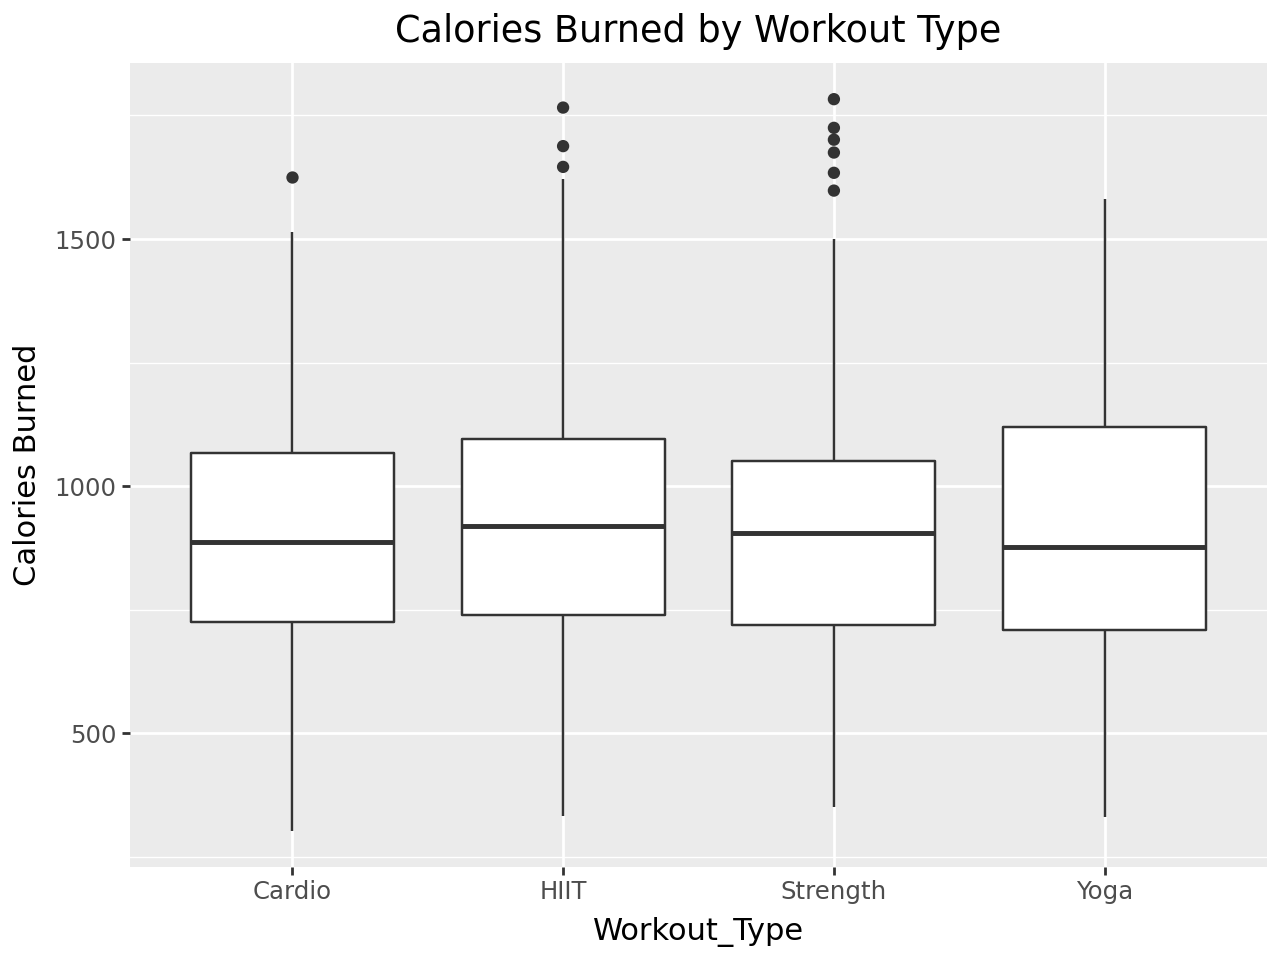

In [20]:
# Visualize the difference in calories burned across different workout types.
plot_calories_burned = (
    ggplot(df_gym, aes(x="Workout_Type", y="Calories_Burned"))
    + geom_boxplot()
    + labs(title="Calories Burned by Workout Type", x="Workout_Type", y="Calories Burned")
)
print(plot_calories_burned)

### 5. BMI Distribution and Relationship with Workout Type

C:\Users\raiss\AppData\Local\Temp\ipykernel_31044\1443360007.py:7: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


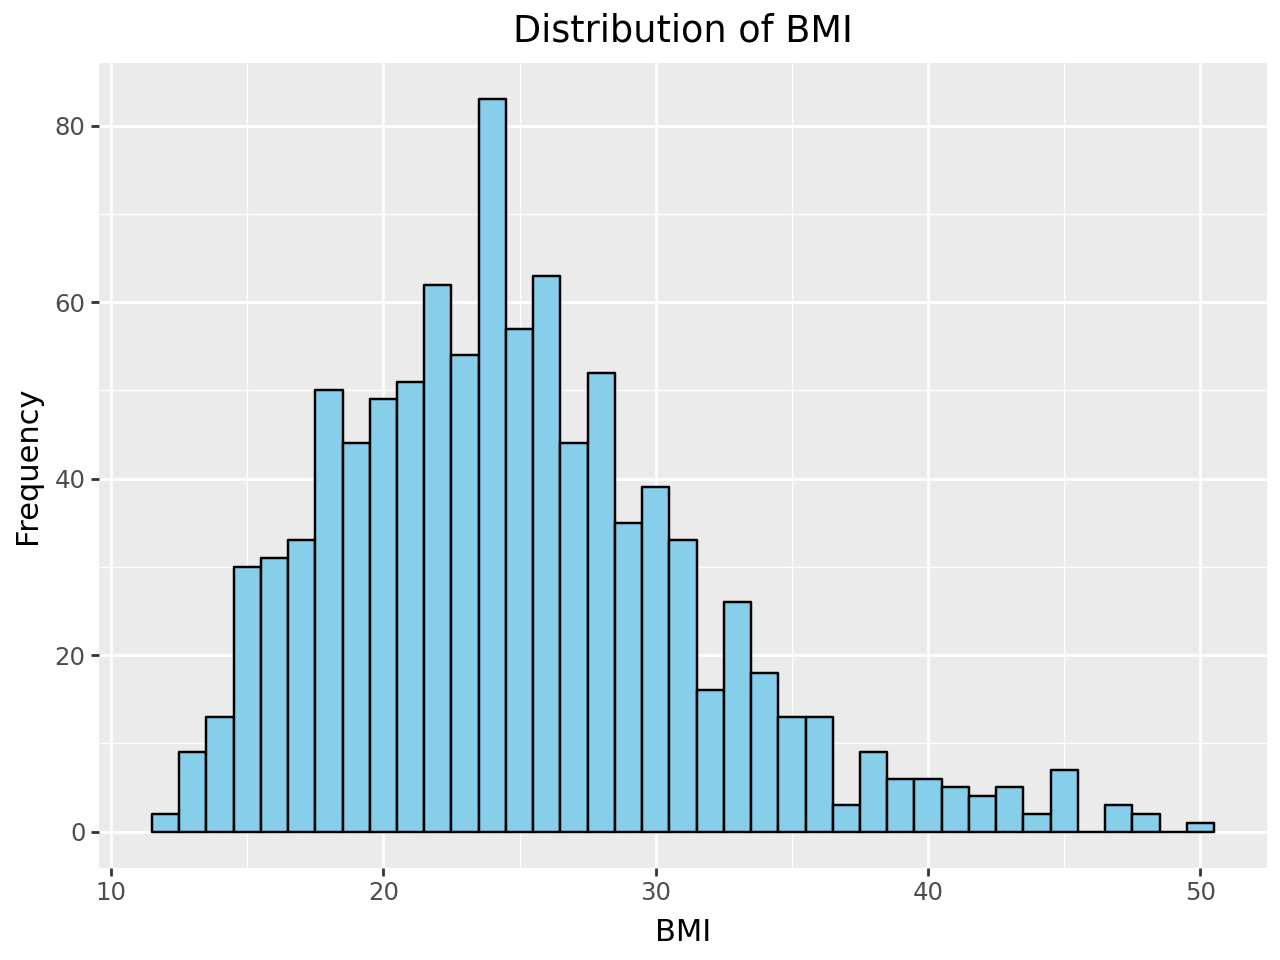

In [21]:
# Check BMI distribution and examine if BMI varies with workout type.
plot_bmi_distribution = (
    ggplot(df_gym, aes(x="BMI"))
    + geom_histogram(binwidth=1, fill="skyblue", color="black")
    + labs(title="Distribution of BMI", x="BMI", y="Frequency")
)
print(plot_bmi_distribution)

C:\Users\raiss\AppData\Local\Temp\ipykernel_31044\2520461473.py:6: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


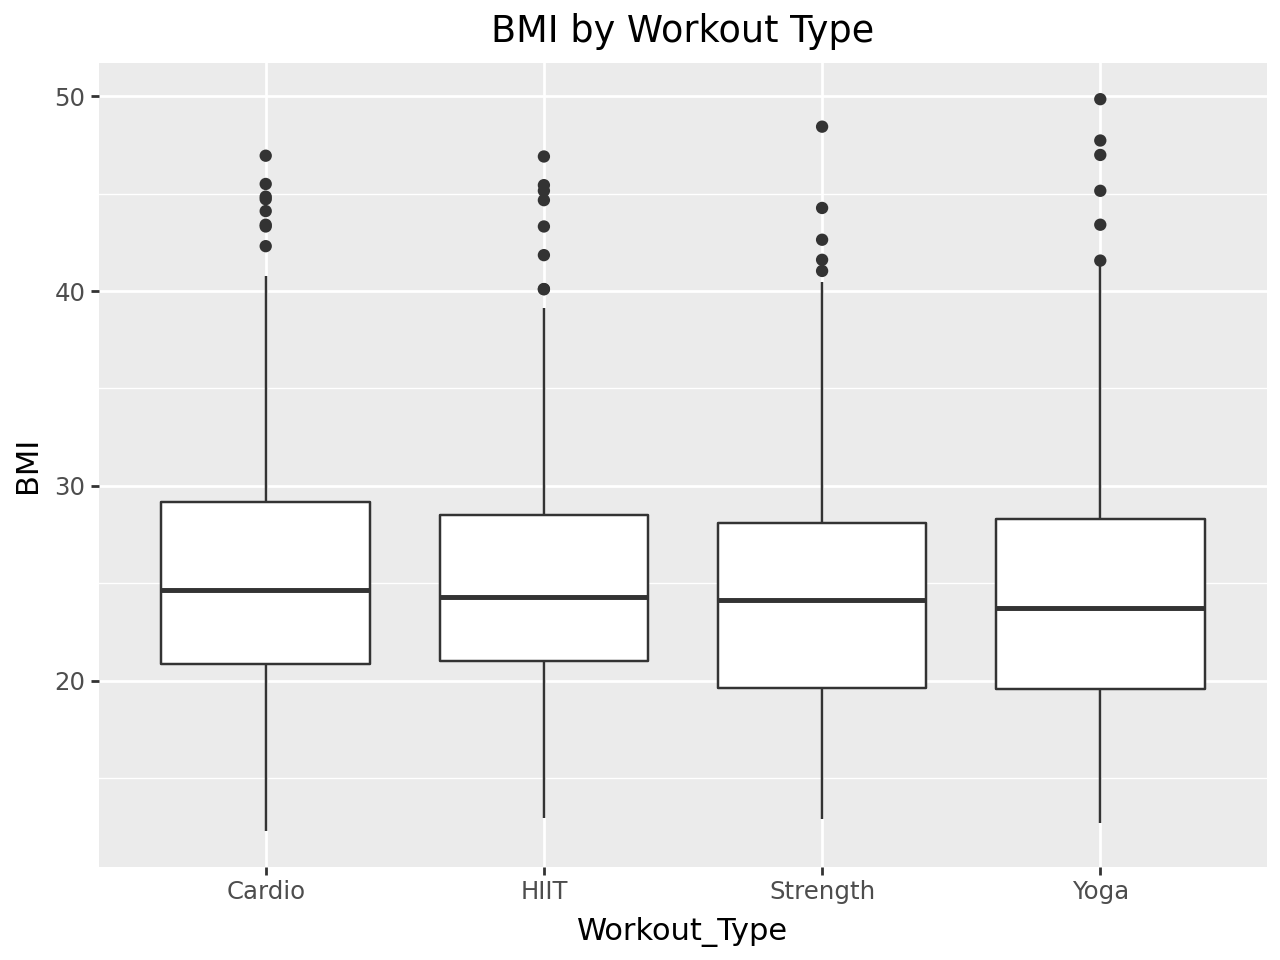

In [22]:
plot_bmi_workout_type = (
    ggplot(df_gym, aes(x="Workout_Type", y="BMI"))
    + geom_boxplot()
    + labs(title="BMI by Workout Type", x="Workout_Type", y="BMI")
)
print(plot_bmi_workout_type)

### 6. Workout Frequency and Calories Burned

C:\Users\raiss\AppData\Local\Temp\ipykernel_31044\22254352.py:12: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


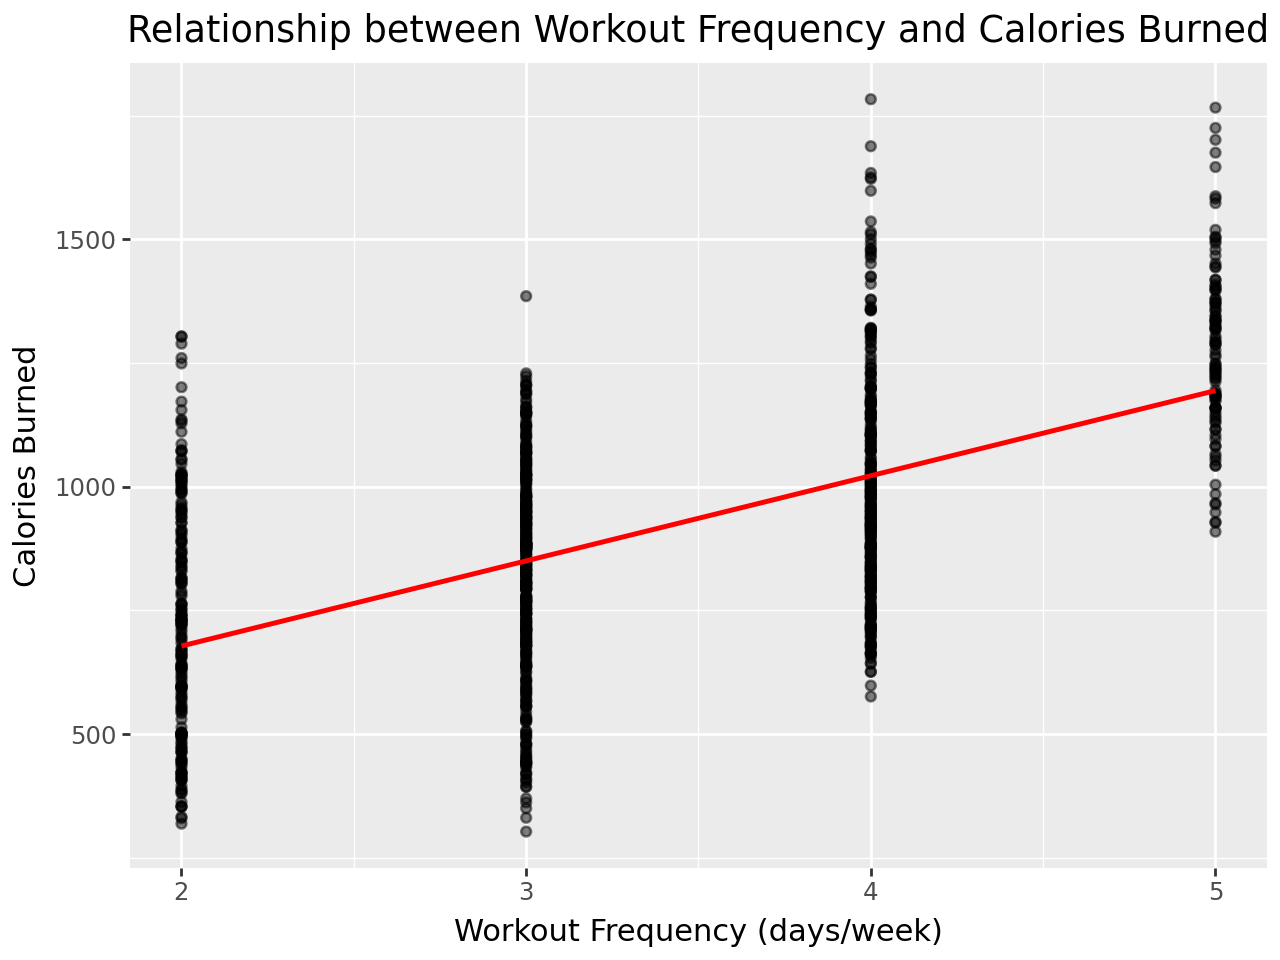

In [24]:
# Analyze if workout frequency is associated with calories burned per session.
plot_frequency_calories = (
    ggplot(df_gym, aes(x="Workout_Frequency (days/week)", y="Calories_Burned"))
    + geom_point(alpha=0.5)
    + geom_smooth(method="lm", se=False, color="red")
    + labs(
        title="Relationship between Workout Frequency and Calories Burned",
        x="Workout Frequency (days/week)",
        y="Calories Burned"
    )
)
print(plot_frequency_calories)

### 7. Transforming the "is_aerobic" variable

In [25]:
# Create a boolean column to categorize workouts as aerobic or not based on Workout_Type.
df_gym["is_aerobic"] = df_gym["Workout_Type"].apply(lambda x: "Strength" not in x)

In [26]:
# Function to shuffle the 'is_aerobic' column
# This creates a randomized distribution for comparison or hypothesis testing.
def shuffle_is_aerobic(df):
    df_shuffle = df.copy(deep=True)
    is_aerobic = df_shuffle["is_aerobic"]
    is_aerobic_index = np.random.permutation(df_shuffle.index)
    df_shuffle["is_aerobic"] = is_aerobic[is_aerobic_index].values
    return df_shuffle

df_shuffle = shuffle_is_aerobic(df_gym)
display(df_shuffle.head())

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,is_aerobic
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20,False
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00,True
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71,True
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41,True
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39,True


### 8. Analysis of BPM (Heart Rate) by Workout Type

C:\Users\raiss\AppData\Local\Temp\ipykernel_31044\3729610131.py:7: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


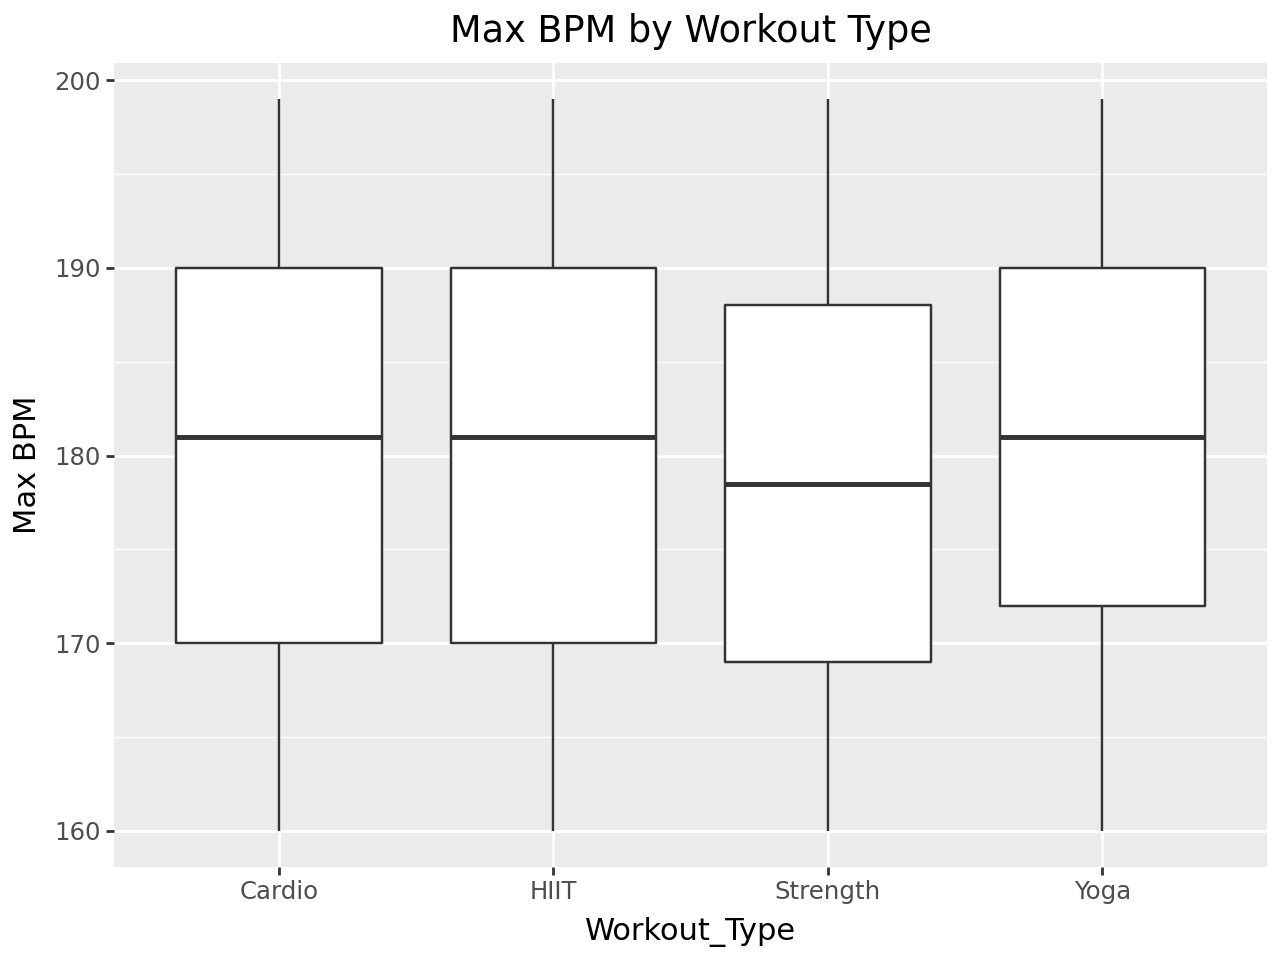

In [27]:
# Explore max and average BPM to gauge workout intensity.
plot_max_bpm = (
    ggplot(df_gym, aes(x="Workout_Type", y="Max_BPM"))
    + geom_boxplot()
    + labs(title="Max BPM by Workout Type", x="Workout_Type", y="Max BPM")
)
print(plot_max_bpm)

C:\Users\raiss\AppData\Local\Temp\ipykernel_31044\2034034590.py:6: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


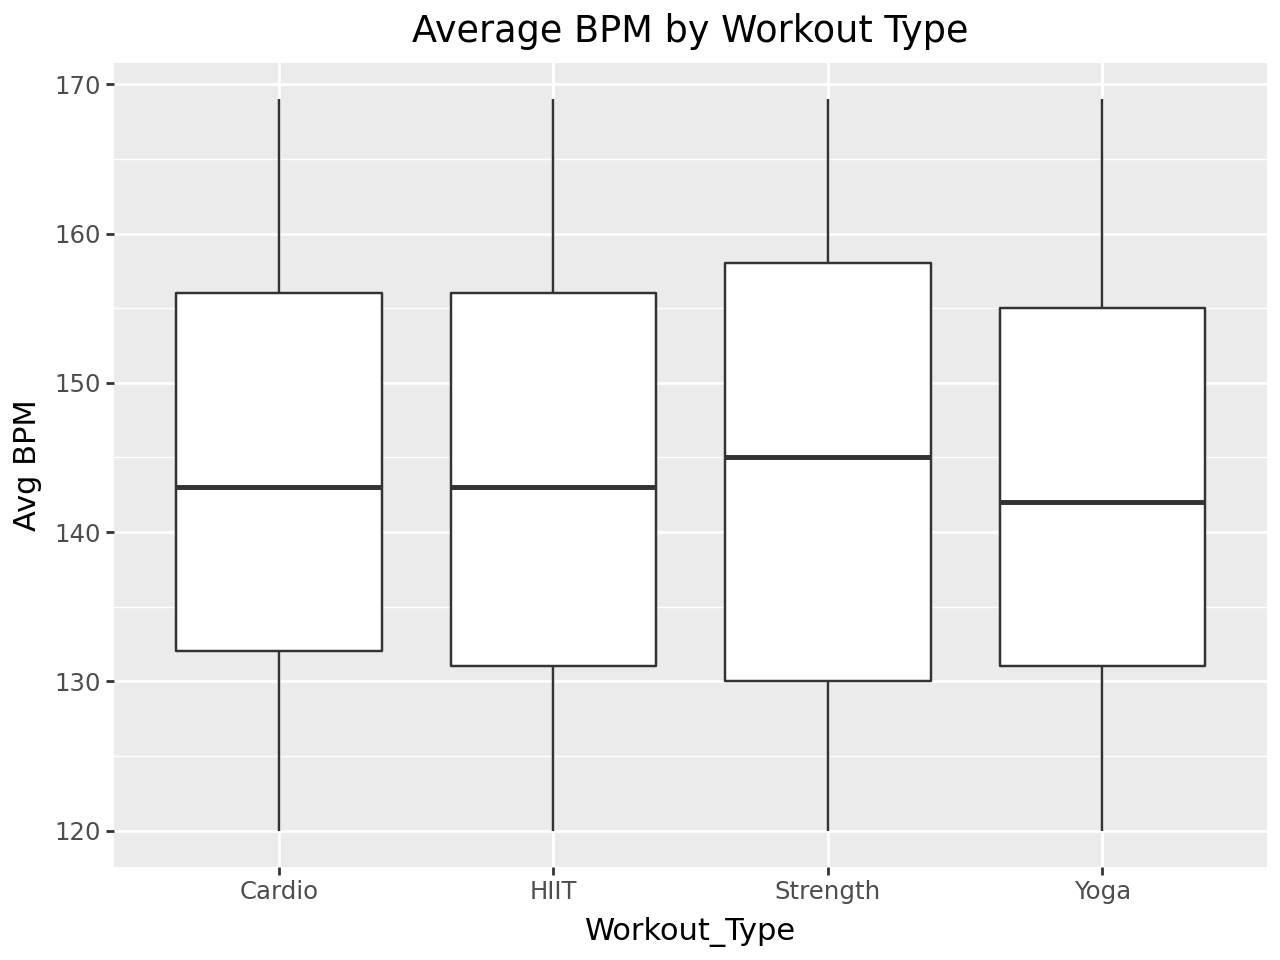

In [28]:
plot_avg_bpm = (
    ggplot(df_gym, aes(x="Workout_Type", y="Avg_BPM"))
    + geom_boxplot()
    + labs(title="Average BPM by Workout Type", x="Workout_Type", y="Avg BPM")
)
print(plot_avg_bpm)

### 9. Session Duration and Calories Burned

C:\Users\raiss\AppData\Local\Temp\ipykernel_31044\1964128577.py:12: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


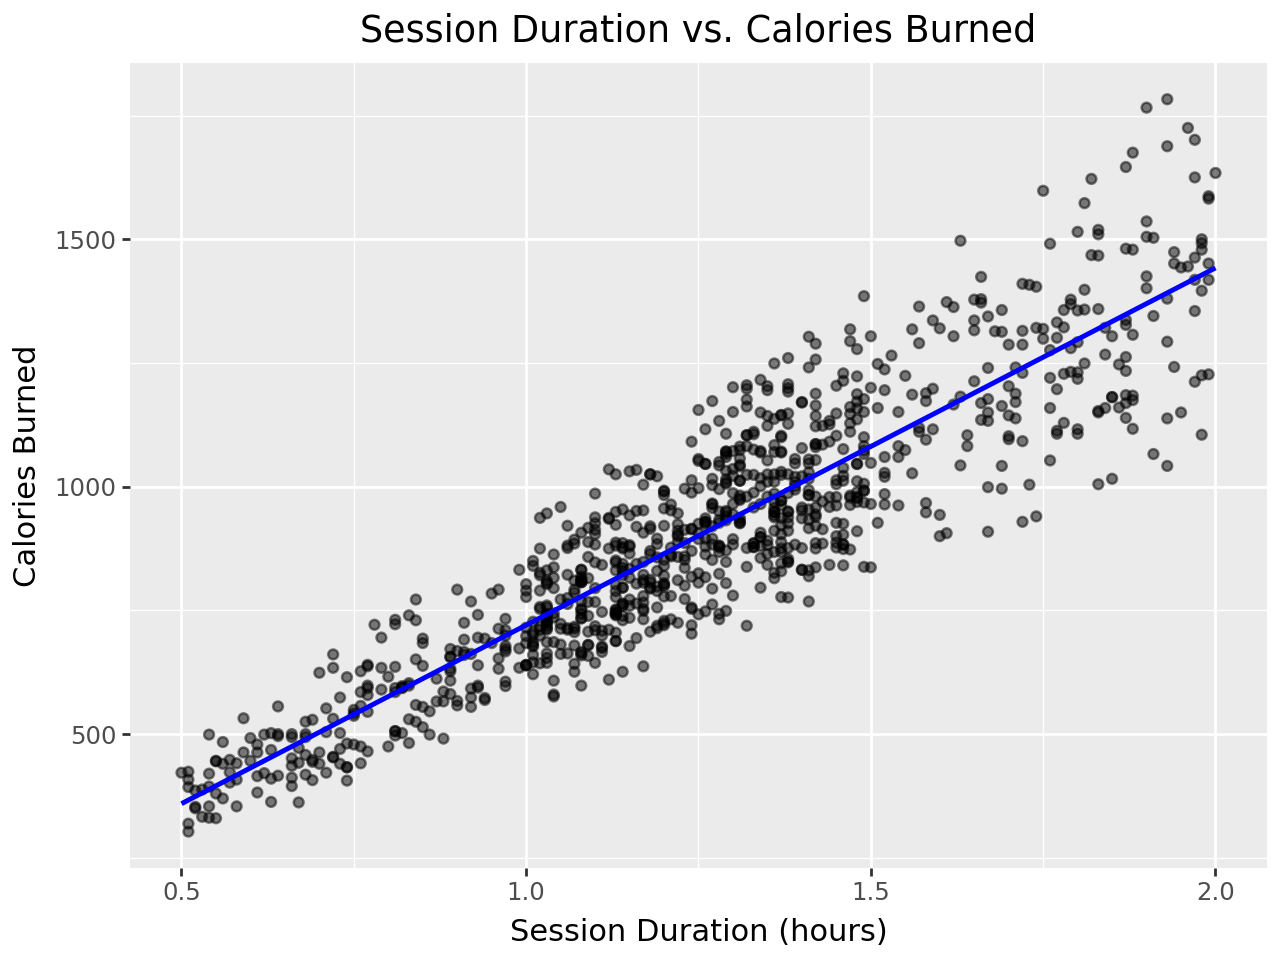

In [30]:
# Check if session duration is associated with calories burned.
plot_session_duration_calories = (
    ggplot(df_gym, aes(x="Session_Duration (hours)", y="Calories_Burned"))
    + geom_point(alpha=0.5)
    + geom_smooth(method="lm", se=False, color="blue")
    + labs(
        title="Session Duration vs. Calories Burned",
        x="Session Duration (hours)",
        y="Calories Burned"
    )
)
print(plot_session_duration_calories)

### 10. Correlation between Numerical Variables

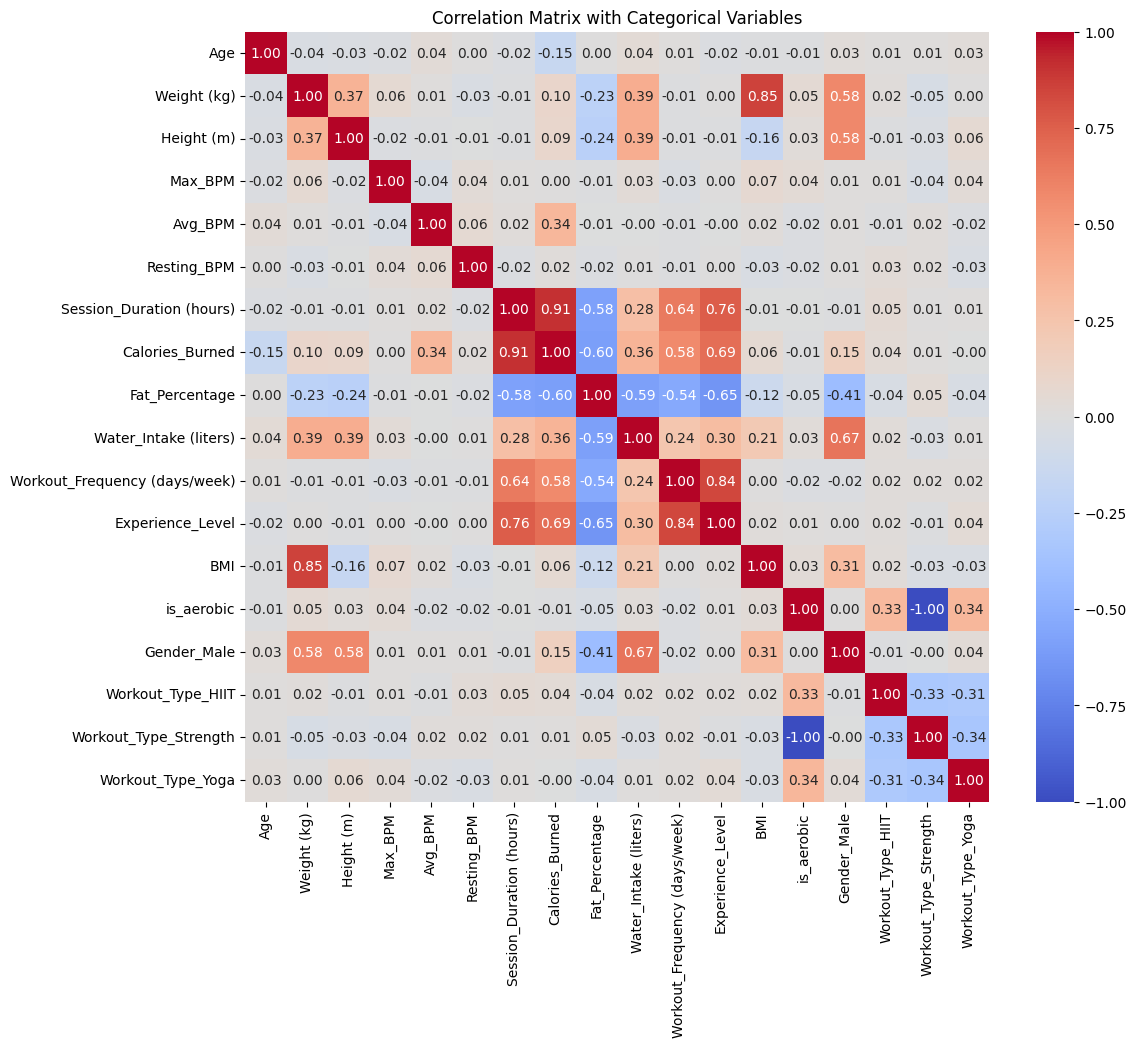

In [41]:
# Calculate the correlation matrix for the encoded dataset
correlation_matrix = df_encoded.corr()

# Plotting the correlation matrix with a heatmap for better visualization
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix with Categorical Variables")
plt.show()